# COMP90084 Workshop Week 5

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plt
from qiskit.quantum_info import partial_trace, DensityMatrix, Statevector
%matplotlib inline
# shots simulation
backend_sim = Aer.get_backend('qasm_simulator')
# statevector
backend_sv = Aer.get_backend('statevector_simulator')

## Classical Logic with Quantum Circuit

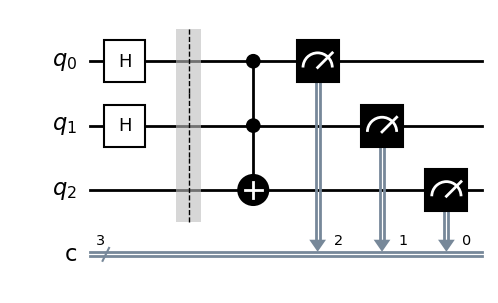

In [2]:
# AND gate
qc_AND = QuantumCircuit(3,3)
# Put all possible inputs into an equal superposition
qc_AND.h(0)
qc_AND.h(1)
qc_AND.barrier()
qc_AND.ccx(0,1,2)
# reverse measurement order
# pay attention to the qubit and cbit order
qc_AND.measure(0,2)
qc_AND.measure(1,1)
qc_AND.measure(2,0)
# draw the circuit
qc_AND.draw('mpl',style="bw", scale = 1)

In [3]:
job_AND = backend_sim.run(transpile(qc_AND, backend_sim), shots=4096)
result_AND = job_AND.result()
counts_AND = result_AND.get_counts(qc_AND)
print(counts_AND)

{'100': 1046, '111': 999, '000': 1045, '010': 1006}


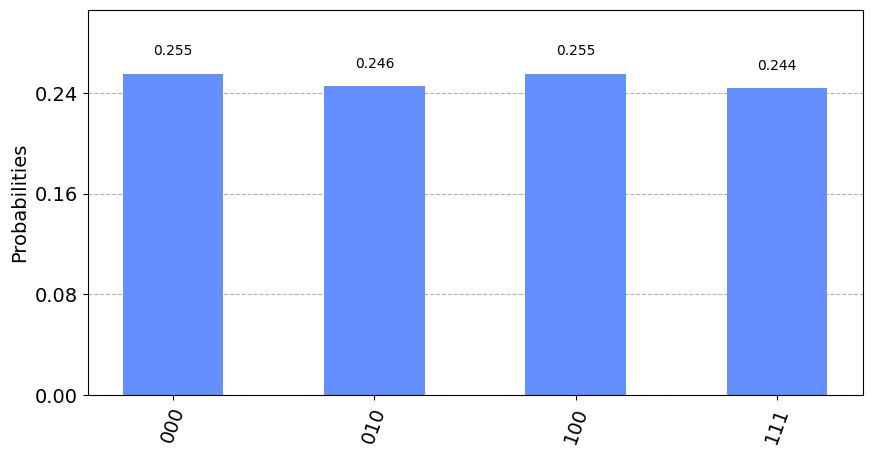

In [4]:
plot_histogram(counts_AND,figsize=(10, 5))

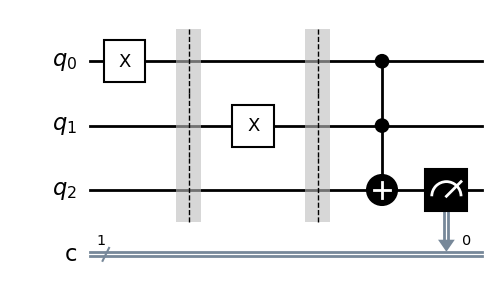

In [5]:
# XOR gate
def get_xor_circ(a=1,b=1):
    qc_xor = QuantumCircuit(3,1)
    # put first qubit in |1> state
    qc_xor.x(0)
    qc_xor.barrier()
    # input data
    assert a>=0 and a<=1
    assert b>=0 and b<=1
    assert type(a) == int and type(b) == int
    if a == 1:
        qc_xor.x(1)
    if b == 1:
        qc_xor.x(2)
    if a==1 or b==1:
        qc_xor.barrier()
    # ccx
    qc_xor.ccx(0,1,2)
    # a XOR b
    qc_xor.measure(2,0)
    return qc_xor

get_xor_circ(a=1,b=0).draw('mpl',style="bw", scale = 1)

1 XOR 1 Measurement results: {'0': 4096}


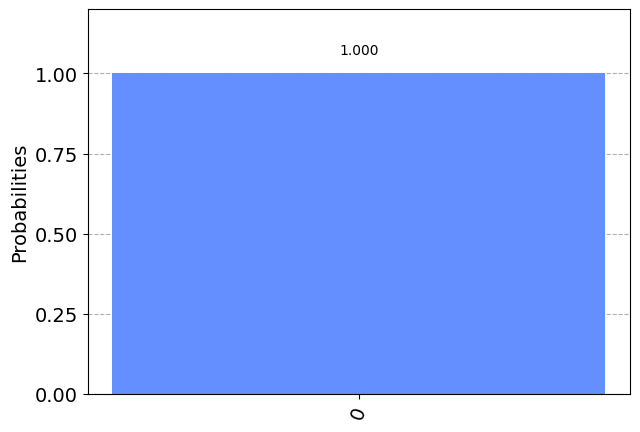

In [6]:
# change a and b to verify different combinations
a = 1
b = 1
qc = get_xor_circ(a,b)
job = backend_sim.run(transpile(qc, backend_sim), shots=4096)
result = job.result()
counts = result.get_counts(qc)
print("{} XOR {} Measurement results:".format(a,b),counts)
plot_histogram(counts)

(NOT 1) OR (NOT 1) Measurement results: {'0': 4096}


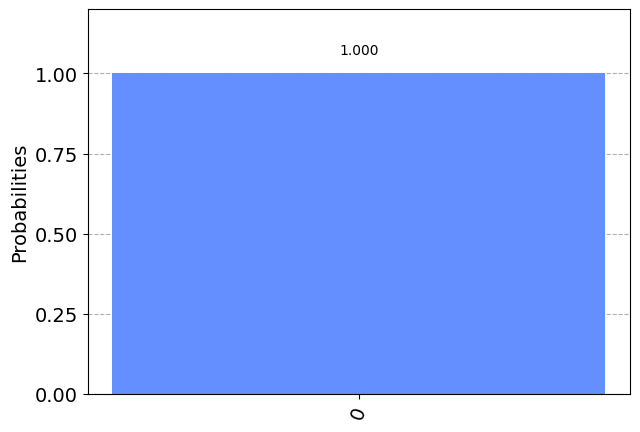

In [7]:
# NOT a OR NOT b gate
def get_not_or_not_circuit(a, b):
    qc = QuantumCircuit(3,1)
    # put last qubit in |1> state
    qc.x(2)
    qc.barrier()
    assert a>=0 and a<=1
    assert b>=0 and b<=1
    assert type(a) == int and type(b) == int
    if a == 1:
        qc.x(0)
    if b == 1:
        qc.x(1)
    if a==1 or b==1:
        qc.barrier()
    # ccx
    qc.ccx(0,1,2)
    # extract result
    qc.measure(2,0)
    return qc

# change a and b to verify different combinations
a = 1
b = 1
qc = get_not_or_not_circuit(a,b)
job = backend_sim.run(transpile(qc, backend_sim), shots=4096)
result = job.result()
counts = result.get_counts(qc)
print("(NOT {}) OR (NOT {}) Measurement results:".format(a,b),counts)
plot_histogram(counts)

## One-bit Adder

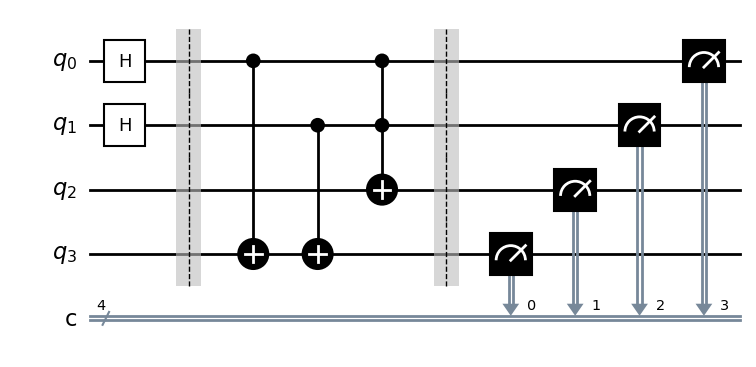

In [8]:
def one_bit_adder_circuit(a=1,b=1, superposition=False):
    if superposition:
        qc = QuantumCircuit(4,4)
        # superposition of all possible inputs
        qc.h(0)
        qc.h(1)
        # 
        qc.barrier()
        qc.cx(0,3)
        qc.cx(1,3)
        qc.ccx(0,1,2)
        qc.barrier()
        # measure a, b and result
        # pay attention to the qubit and cbit order
        qc.measure(3,0)
        qc.measure(2,1)
        qc.measure(1,2)
        qc.measure(0,3)
        return qc
    else:
        qc=QuantumCircuit(4,2)
        assert a>=0 and a<=1
        assert b>=0 and b<=1
        assert type(a) == int and type(b) == int
        if a == 1:
            qc.x(0)
        if b == 1:
            qc.x(1)
        if a==1 or b==1:
            qc.barrier()
        qc.cx(0,3)
        qc.cx(1,3)
        qc.ccx(0,1,2)
        qc.barrier()
        # measure only the result
        # pay attention to the qubit and cbit order
        qc.measure(3,0)
        qc.measure(2,1)
        return qc

# put all possible input into superposition
superpos_circ = one_bit_adder_circuit(superposition=True)
superpos_circ.draw('mpl',style="bw", scale = 1)

All possible results: {'1001': 1049, '1110': 1027, '0101': 1011, '0000': 1009}


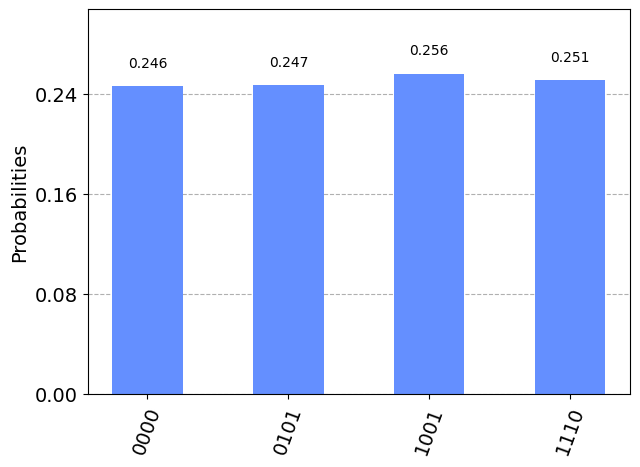

In [9]:
job = backend_sim.run(transpile(superpos_circ, backend_sim), shots=4096)
result = job.result()
counts = result.get_counts(superpos_circ)
print("All possible results:",counts)
plot_histogram(counts)

1 + 0 Measurement results: {'01': 4096}


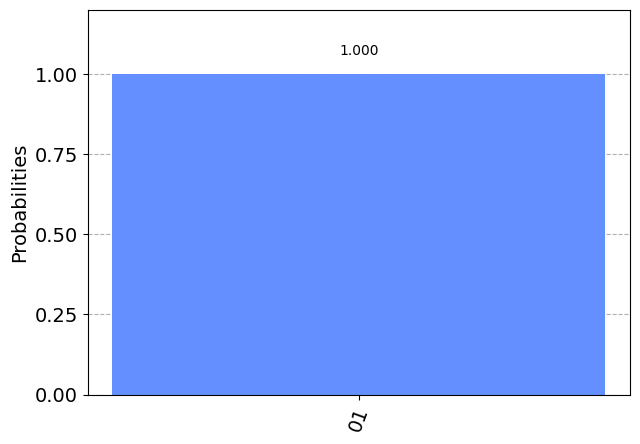

In [10]:
# change a and b to verify different combinations
a = 1
b = 0
qc = one_bit_adder_circuit(a=a,b=b)
job = backend_sim.run(transpile(qc, backend_sim), shots=4096)
result = job.result()
counts = result.get_counts(qc)
print("{} + {} Measurement results:".format(a,b),counts)
plot_histogram(counts)

# Two-bit Adder

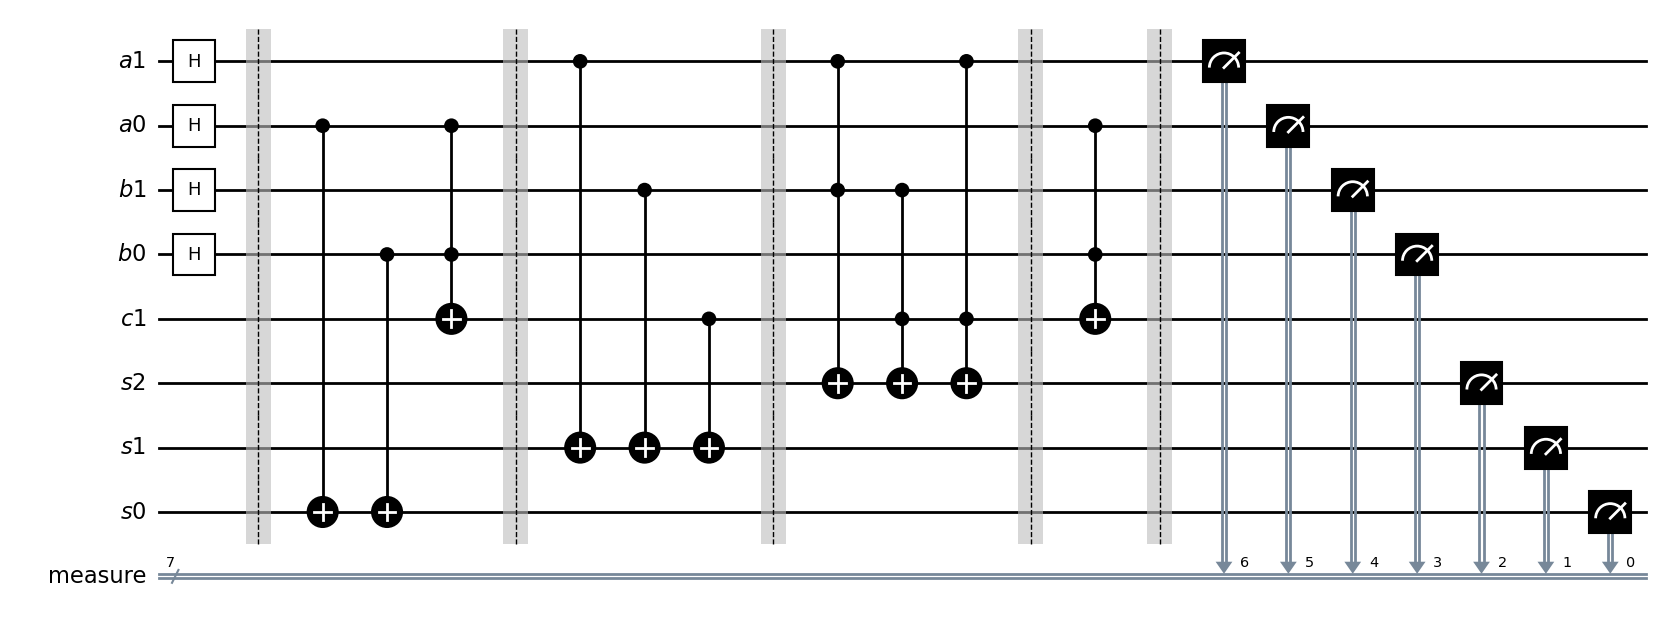

In [11]:
def two_bit_adder(a=1, b=1, superposition=False):
    if superposition:
        a1 = QuantumRegister(1,'a1')
        a0 = QuantumRegister(1,'a0')
        b1 = QuantumRegister(1,'b1')
        b0 = QuantumRegister(1,'b0')
        c1 = QuantumRegister(1,'c1')
        s1 = QuantumRegister(1,'s1')
        s2 = QuantumRegister(1,'s2')
        s0 = QuantumRegister(1,'s0')
        meas = ClassicalRegister(7, 'measure')

        qc = QuantumCircuit(a1, a0, b1, b0, c1, s2, s1, s0, meas)

        qc.h(a1)
        qc.h(a0)
        qc.h(b1)
        qc.h(b0)
        qc.barrier()

        qc.cx(a0, s0)
        qc.cx(b0, s0)
        qc.ccx(a0, b0, c1)
        qc.barrier()
        qc.cx(a1, s1)
        qc.cx(b1, s1)
        qc.cx(c1, s1)
        qc.barrier()
        qc.ccx(a1, b1, s2)
        qc.ccx(b1, c1, s2)
        qc.ccx(a1, c1, s2)
        qc.barrier()
        qc.ccx(a0, b0, c1)
        qc.barrier()
        # pay attention to the qubit and cbit order
        qc.measure(a1, meas[6])
        qc.measure(a0, meas[5])
        qc.measure(b1, meas[4])
        qc.measure(b0, meas[3])
        qc.measure(s2, meas[2])
        qc.measure(s1, meas[1])
        qc.measure(s0, meas[0])
        return qc
    else:
        assert type(a)==int and type(b) == int
        assert 0<=a<=3 and 0<=b<=3
        a_bin_str = "{0:b}".format(a).zfill(2)
        b_bin_str = "{0:b}".format(b).zfill(2)
        print("Binary rep.: a = {}, b = {}".format(a_bin_str, b_bin_str))
        a_list = list(a_bin_str)
        b_list = list(b_bin_str)
        a1 = QuantumRegister(1,'a1')
        a0 = QuantumRegister(1,'a0')
        b1 = QuantumRegister(1,'b1')
        b0 = QuantumRegister(1,'b0')
        c1 = QuantumRegister(1,'c1')
        s1 = QuantumRegister(1,'s1')
        s2 = QuantumRegister(1,'s2')
        s0 = QuantumRegister(1,'s0')
        meas = ClassicalRegister(3, 's')

        qc = QuantumCircuit(a1, a0, b1, b0, c1, s2, s1, s0, meas)
        
        if a_list[-1]=='1':
            qc.x(a0)
        if a_list[-2]=='1':
            qc.x(a1)
        if b_list[-1]=='1':
            qc.x(b0)
        if b_list[-2]=='1':
            qc.x(b1)
        
        if a>0 or b>0:
            qc.barrier()
        
        qc.cx(a0, s0)
        qc.cx(b0, s0)
        qc.ccx(a0, b0, c1)
        qc.barrier()
        qc.cx(a1, s1)
        qc.cx(b1, s1)
        qc.cx(c1, s1)
        qc.barrier()
        qc.ccx(a1, b1, s2)
        qc.ccx(b1, c1, s2)
        qc.ccx(a1, c1, s2)
        qc.barrier()
        qc.ccx(a0, b0, c1)
        qc.barrier()
        # pay attention to the qubit and cbit order
        qc.measure(s2, meas[2])
        qc.measure(s1, meas[1])
        qc.measure(s0, meas[0])
        return qc

# superposition
superpos_circ = two_bit_adder(superposition=True)
superpos_circ.draw('mpl',style="bw", scale = 1)

All possible results: {'1011101': 249, '1100011': 231, '1101100': 266, '0101010': 220, '0000000': 264, '0111100': 267, '1110101': 244, '1000010': 257, '1010100': 274, '1001011': 248, '1111110': 272, '0100001': 277, '0010010': 264, '0110011': 266, '0011011': 234, '0001001': 263}


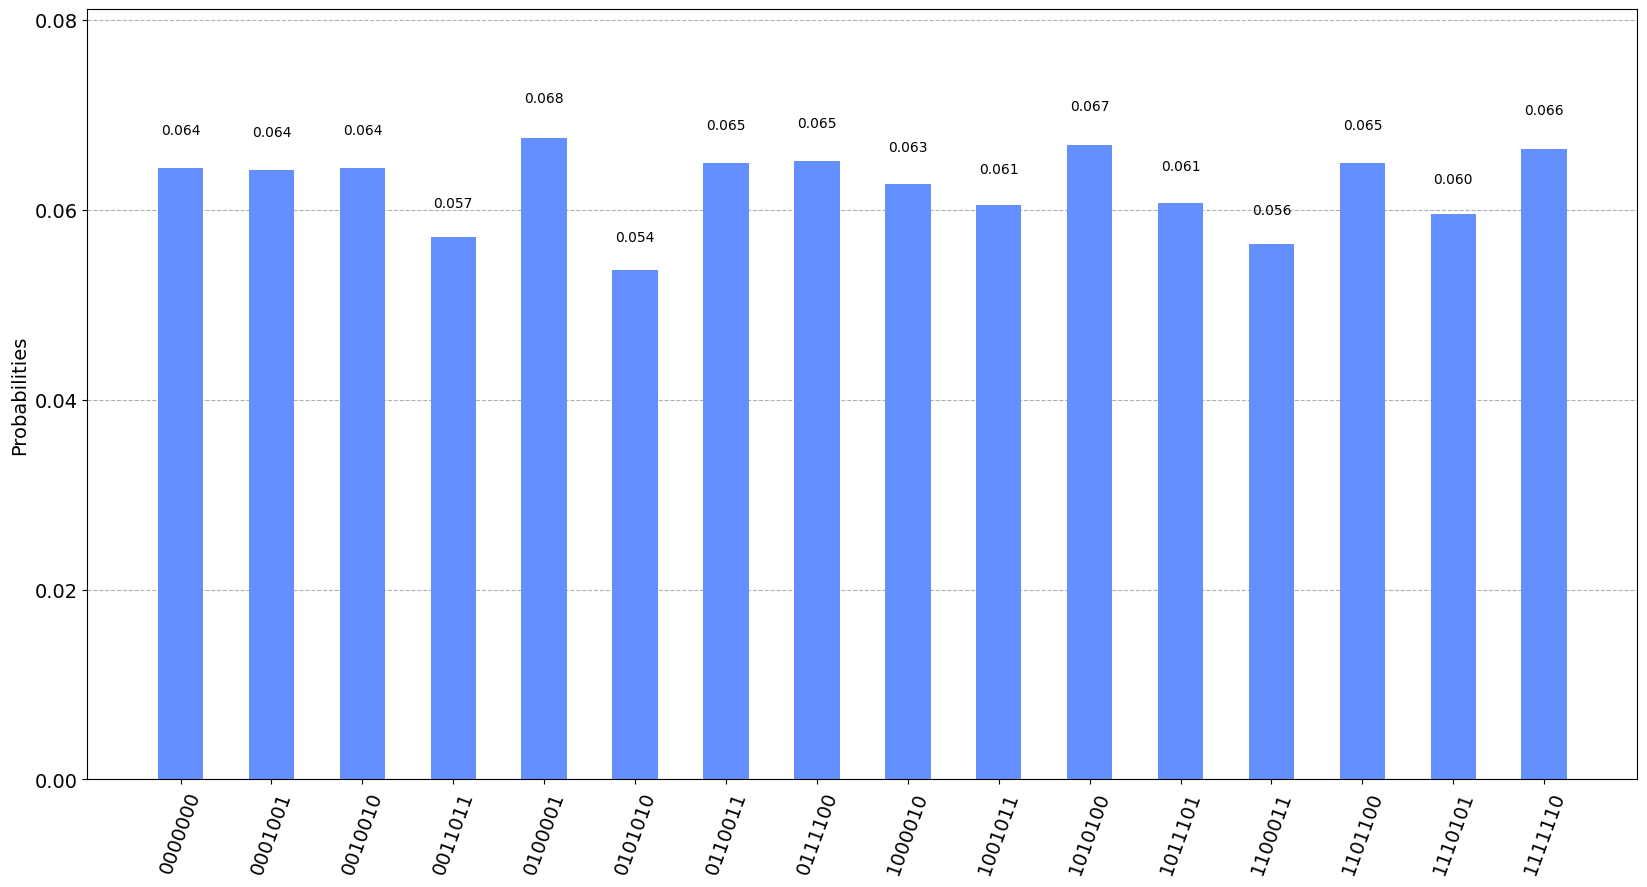

In [12]:
# superposition
job = backend_sim.run(transpile(superpos_circ, backend_sim), shots=4096)
result = job.result()
counts = result.get_counts(superpos_circ)
print("All possible results:",counts)
plot_histogram(counts,figsize=(20, 10))

Binary rep.: a = 11, b = 10
3 + 2 Measurement results: {'101': 4096}


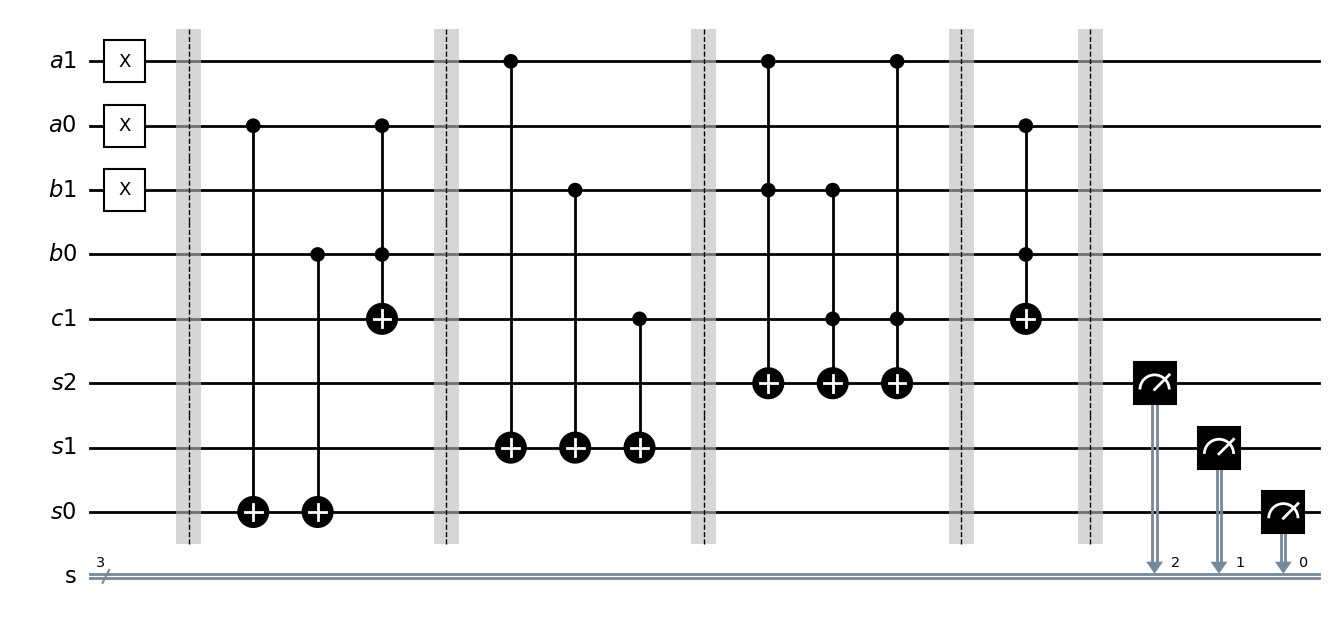

In [13]:
# change a and b to verify different combinations
a = 3
b = 2
qc = two_bit_adder(a=a,b=b)
job = backend_sim.run(transpile(qc, backend_sim), shots=4096)
result = job.result()
counts = result.get_counts(qc)
print("{} + {} Measurement results:".format(a,b),counts)
# plot_histogram(counts)
qc.draw('mpl',style="bw", scale = 1)

## Quantum Teleportation

In [24]:
def teleportation_circ(alpha, beta):
    # normalize the amplitude
    norm_factor = np.sqrt(np.real(alpha*np.conjugate(alpha))+np.real(beta*np.conjugate(beta)))
    alpha = alpha/norm_factor
    beta = beta/norm_factor
    psi = DensityMatrix(Statevector([alpha, beta]))
    print("State to be teleported: \n|psi> = ({}) * |0> + ({}) * |1>\n".format(alpha, beta),np.real_if_close(psi.data))
    alice = QuantumRegister(1, "alice")
    bell_pair = QuantumRegister(2, "bellPair")
    x_classical = ClassicalRegister(1, "x")
    z_classical = ClassicalRegister(1, "z")
    qc = QuantumCircuit(alice, bell_pair, x_classical, z_classical)
    qc.initialize([alpha, beta], alice) 
    qc.barrier()
    qc.h(bell_pair[0])
    qc.cx(bell_pair[0], bell_pair[1])
    qc.barrier()
    qc.cx(alice, bell_pair[0])
    qc.h(alice)
    qc.barrier()
    qc.measure(bell_pair[0], x_classical)
    qc.measure(alice, z_classical)
    qc.barrier()
    qc.x(bell_pair[1]).c_if(x_classical, 1)
    qc.z(bell_pair[1]).c_if(z_classical,1)
    # take a snap shot of the final state
    qc.snapshot(label="Bob_State", qubits=[bell_pair[1]])
    qc.draw('mpl',style="bw", scale = 1)
    return qc

[-0.7071067811865475, 0.7071067811865475j]
State to be teleported: 
|psi> = (-0.7071067811865476) * |0> + (0.7071067811865476j) * |1>
 [[0.5+0.j  0. +0.5j]
 [0. -0.5j 0.5+0.j ]]
Classical information sent by Alice: dict_keys(['0 0'])
State recieved by Bob:
 [[ 5.000000e-01+0.j  -6.123234e-17+0.5j]
 [-6.123234e-17-0.5j  5.000000e-01+0.j ]]
[0.5+0.j 0.5+0.j]


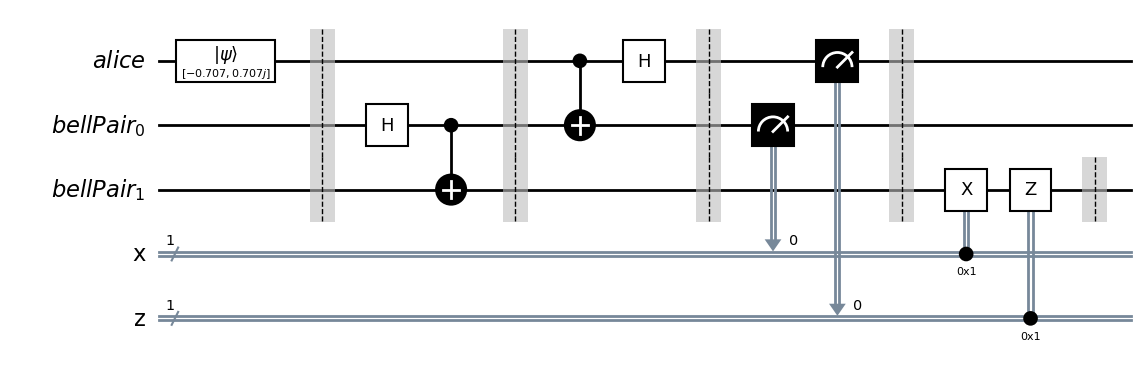

In [25]:
# change the state to be teleported
psi = [-1/np.sqrt(2),1j/np.sqrt(2)]

print(psi)
qc=teleportation_circ(*psi)
job = backend_sv.run(transpile(qc, backend_sv), shots=1)
result = job.result()
counts = result.get_counts(qc)
print("Classical information sent by Alice:", counts.keys())
bob_state = partial_trace(result.get_statevector(), [0,1]) # snapshot in qiskit keeps all the qubits, need to trace out the measured ones
print("State recieved by Bob:\n",np.real_if_close(bob_state.data))
print(np.diagonal(bob_state.data))
qc.draw('mpl',style="bw", scale = 1)

## Dense Coding

Classical information: [0, 1]
Bob recieved: {'01': 4096}


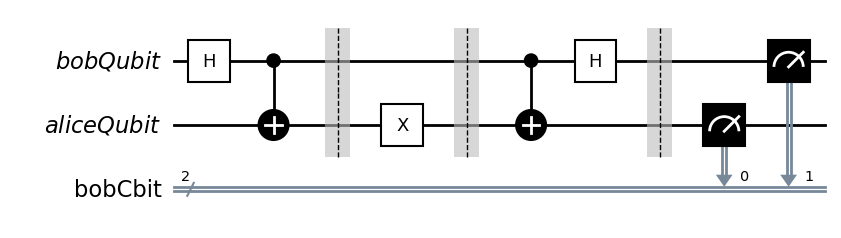

In [16]:
def dense_coding_circ(bit0, bit1):
    assert bit0 in {0,1} and bit1 in {0,1}
    alice = QuantumRegister(1, "aliceQubit")
    bob = QuantumRegister(1, "bobQubit")
    bob_classical = ClassicalRegister(2, 'bobCbit')
    qc = QuantumCircuit(bob, alice, bob_classical)
    
    qc.h(bob)
    qc.cx(bob, alice)
    qc.barrier()
    if bit1 == 1:
        qc.x(alice)
    if bit0 == 1:
        qc.z(alice)
    qc.barrier()
    qc.cx(bob, alice)
    qc.h(bob)
    qc.barrier()
    # pay attention to the qubit and cbit order
    qc.measure(alice, bob_classical[0])
    qc.measure(bob, bob_classical[1])
    return qc

# change the bits being coded and see different results
bits=[0,1]
print("Classical information:", bits)
qc=dense_coding_circ(*bits)
job = backend_sim.run(transpile(qc, backend_sim), shots=4096)
result = job.result()
counts = result.get_counts(qc)
print("Bob recieved:", counts)
qc.draw('mpl',style="bw", scale = 1)

{'00 00': 1038, '11 11': 1025, '10 10': 979, '01 01': 1054}


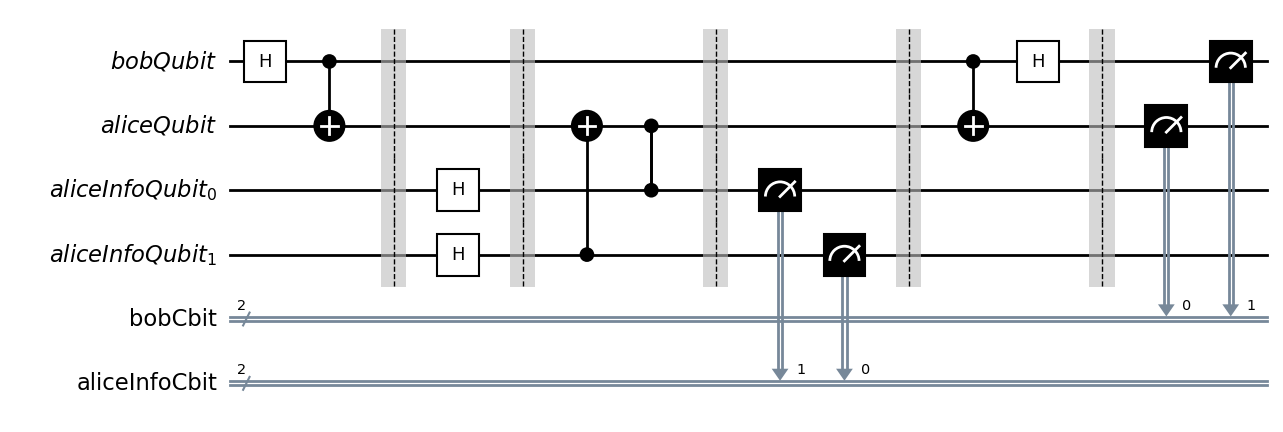

In [17]:
# put everything into equal superpostion?
def dense_coding_circ_superpose():
    alice = QuantumRegister(1, "aliceQubit")
    alice_info = QuantumRegister(2, "aliceInfoQubit")
    alice_info_classical = ClassicalRegister(2, "aliceInfoCbit")
    bob = QuantumRegister(1, "bobQubit")
    bob_classical = ClassicalRegister(2, 'bobCbit')
    qc = QuantumCircuit(bob, alice, bob_classical, alice_info, alice_info_classical)
    
    qc.h(bob)
    qc.cx(bob, alice)
    qc.barrier()
    qc.h(alice_info)
    qc.barrier()
    qc.cx(alice_info[1], alice)
    qc.cz(alice_info[0], alice)
    qc.barrier()
    qc.measure(alice_info[0], alice_info_classical[1])
    qc.measure(alice_info[1], alice_info_classical[0])
    qc.barrier()
    qc.cx(bob, alice)
    qc.h(bob)
    qc.barrier()
    # pay attention to the qubit and cbit order
    qc.measure(alice, bob_classical[0])
    qc.measure(bob, bob_classical[1])
    
    return qc

qc=dense_coding_circ_superpose()
job = backend_sim.run(transpile(qc, backend_sim), shots=4096)
result = job.result()
counts = result.get_counts(qc)
print(counts)
qc.draw('mpl',style="bw", scale = 1)